# **Sine model**

In [1]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)), #Input layer
    tf.keras.layers.Dense(100, activation='relu'), #Hidden layer
    tf.keras.layers.Dense(1) #Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

def generate_data(num_samples):
    x_points = np.random.rand(num_samples) * 10
    y_points = np.sin(x_points)
    return x_points, y_points


x_generated, y_generated = generate_data(10000)

model.fit(x_generated, y_generated, epochs=10)

model.save('my_model.keras')

Epoch 1/10
313/313 [==============================] - 8s 13ms/step - loss: 0.3856
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 0.1626
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1119
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0768
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0433
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0179
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0053
Epoch 8/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0020
Epoch 9/10
313/313 [==============================] - 4s 13ms/step - loss: 8.0814e-04
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 3.9464e-04


# **Sine Tester**

32/32 [==============================] - 0s 8ms/step


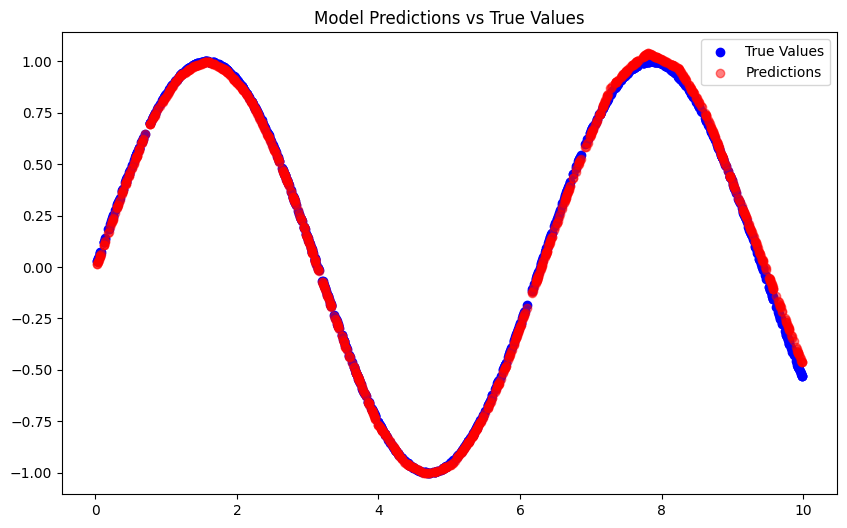

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples):
    x_points = np.random.rand(num_samples) * 10
    y_points = np.sin(x_points)
    return x_points, y_points

x_test, y_test = generate_data(1000)

model = tf.keras.models.load_model('my_model.keras')

y_predicted = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='True Values')
plt.scatter(x_test, y_predicted, color='red', label='Predictions', alpha=0.5)
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()

# **Sine Converter**

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('my_model.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
xxd -i model.tflite > model_data.h

# **Testen ESP32-CAM sinus**

(array([2.4697698 , 1.45391051]), array([0.62241375, 0.99317663]))
[0.6626, 0.7475, 0.7839, -0.4595]


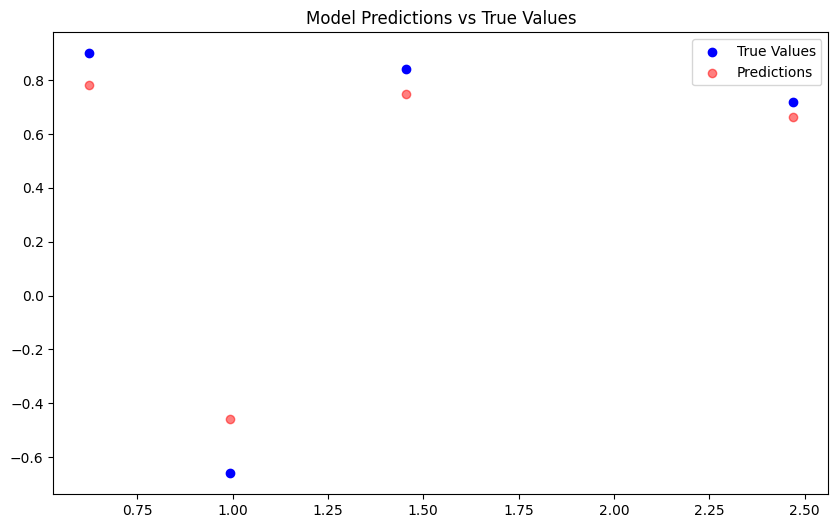

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
x_test = generate_data(2)  # Using the same generate_data function
print(x_test)
y_test = [0.7200, 0.8400, 0.900, -0.6600]
#load the model
model = tf.keras.models.load_model('my_model.keras')

# Predict with the model
y_pred = [0.6626, 0.7475, 0.7839, -0.4595]
print(y_pred)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='True Values')
plt.scatter(x_test, y_pred, color='red', label='Predictions', alpha=0.5)
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()